In [22]:
%matplotlib inline

# Data Exploration

Your function returned a count of 8792  cars and 8968  non-cars
of size:  (64, 64, 3)  and data type: float32


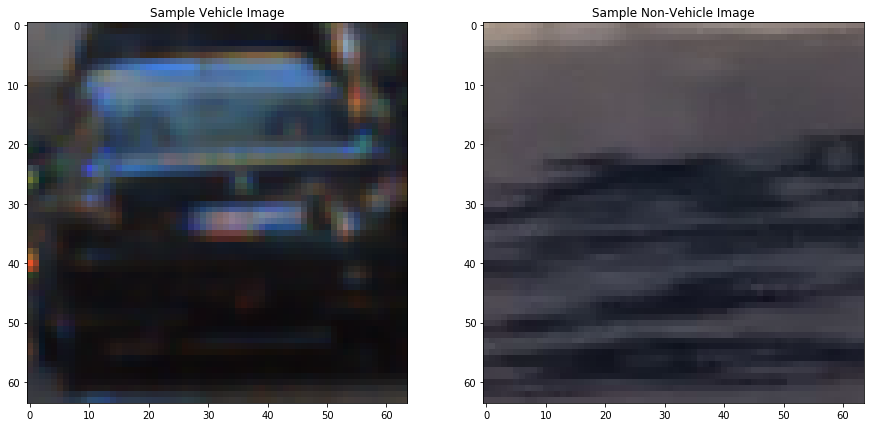

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
from utilities import get_training_data
#from skimage.feature import hog
#from skimage import color, exposure
# images are divided up into vehicles and non-vehicles

cars, notcars = get_training_data()
        
# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    example_img = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = example_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = example_img.dtype
    # Return data_dict
    return data_dict

data_info = data_look(cars, notcars)

print('Your function returned a count of', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])
# Just for fun choose random car / not-car indices and plot example images   
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))
    
# Read in car / not-car images
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])


# Plot the examples
fig = plt.figure(figsize=(15, 9))
plt.subplot(121)
plt.imshow(car_image)
plt.title('Sample Vehicle Image')
plt.subplot(122)
plt.imshow(notcar_image)
plt.title('Sample Non-Vehicle Image');


## Visualize HOG features

/Users/ppoon/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


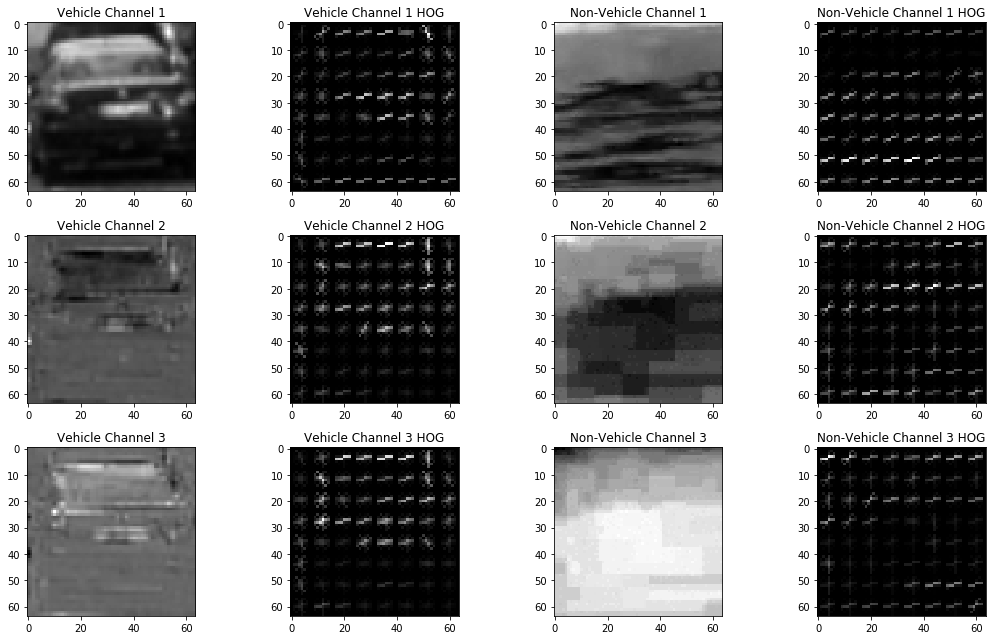

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from classifier import get_hog_features
from utilities import get_training_data

# Read in our vehicles and non-vehicles
cars, notcars = get_training_data()

# Read in the images
car_image = mpimg.imread(cars[car_ind])
car_image = cv2.cvtColor(car_image, cv2.COLOR_RGB2YCrCb)
car_channel_1 = car_image[:,:,0]
car_channel_2 = car_image[:,:,1]
car_channel_3 = car_image[:,:,2]

non_car_image = mpimg.imread(notcars[notcar_ind])
non_car_image = cv2.cvtColor(non_car_image, cv2.COLOR_RGB2YCrCb)
non_car_channel_1 = non_car_image[:,:,0]
non_car_channel_2 = non_car_image[:,:,1]
non_car_channel_3 = non_car_image[:,:,2]

# HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2

# Call our function with vis=True to see an image output
_, car_hog_image_ch1 = get_hog_features(car_channel_1, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
_, car_hog_image_ch2 = get_hog_features(car_channel_2, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
_, car_hog_image_ch3 = get_hog_features(car_channel_3, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)

_, non_car_hog_image_ch1 = get_hog_features(non_car_channel_1, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
_, non_car_hog_image_ch2 = get_hog_features(non_car_channel_2, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
_, non_car_hog_image_ch3 = get_hog_features(non_car_channel_3, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)

# Plot the examples
fig, ax = plt.subplots(3, 4, figsize=(15, 9))

ax[0, 0].imshow(car_channel_1, cmap='gray')
ax[0, 0].set_title('Vehicle Channel 1')
ax[0, 1].imshow(car_hog_image_ch1, cmap='gray')
ax[0, 1].set_title('Vehicle Channel 1 HOG');
ax[0, 2].imshow(non_car_channel_1, cmap='gray')
ax[0, 2].set_title('Non-Vehicle Channel 1')
ax[0, 3].imshow(non_car_hog_image_ch1, cmap='gray')
ax[0, 3].set_title('Non-Vehicle Channel 1 HOG');

ax[1, 0].imshow(car_channel_2, cmap='gray')
ax[1, 0].set_title('Vehicle Channel 2')
ax[1, 1].imshow(car_hog_image_ch2, cmap='gray')
ax[1, 1].set_title('Vehicle Channel 2 HOG');
ax[1, 2].imshow(non_car_channel_2, cmap='gray')
ax[1, 2].set_title('Non-Vehicle Channel 2')
ax[1, 3].imshow(non_car_hog_image_ch2, cmap='gray')
ax[1, 3].set_title('Non-Vehicle Channel 2 HOG');

ax[2, 0].imshow(car_channel_3, cmap='gray')
ax[2, 0].set_title('Vehicle Channel 3')
ax[2, 1].imshow(car_hog_image_ch3, cmap='gray')
ax[2, 1].set_title('Vehicle Channel 3 HOG');
ax[2, 2].imshow(non_car_channel_3, cmap='gray')
ax[2, 2].set_title('Non-Vehicle Channel 3')
ax[2, 3].imshow(non_car_hog_image_ch3, cmap='gray')
ax[2, 3].set_title('Non-Vehicle Channel 3 HOG');

fig.tight_layout()


## TEST: Color space comparison

In [5]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from random import shuffle
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
# from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from classifier import extract_features, get_hog_features
from utilities import get_training_data


# Divide up into cars and notcars
cars, notcars = get_training_data()
shuffle(cars)
shuffle(notcars)


# Reduce the sample size because HOG features are slow to compute
# The quiz evaluator times out after 13s of CPU time
sample_size = 1500
cars = cars[0:sample_size]
notcars = notcars[0:sample_size]

### TODO: Tweak these parameters and see how the results change.
colorspace = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"


# for colorspace in ['RGB', 'HSV', 'LUV', 'HLS', 'YUV', 'YCrCb']:
for colorspace in ['RGB', 'HSV', 'HLS', 'YCrCb']:

    print('\ncolorspace: {}...'.format(colorspace))

    t=time.time()
    car_features = extract_features(cars,
                                    color_space=colorspace,
                                    orient=orient, 
                                    pix_per_cell=pix_per_cell,
                                    cell_per_block=cell_per_block, 
                                    hog_channel=hog_channel)
    notcar_features = extract_features(notcars,
                                       color_space=colorspace,
                                       orient=orient, 
                                       pix_per_cell=pix_per_cell,
                                       cell_per_block=cell_per_block, 
                                       hog_channel=hog_channel)
    t2 = time.time()
    print(round(t2-t, 2), 'Seconds to extract HOG features...')

    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        

    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)

    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)

    # Define the labels vector
    y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

    # Split up data into randomized training and test sets
    rand_state = np.random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=rand_state)

    print('Using:',orient,'orientations',pix_per_cell, 'pixels per cell and', cell_per_block,'cells per block')
    print('Feature vector length:', len(X_train[0]))

    # Use a linear SVC 
    svc = LinearSVC()

    # Check the training time for the SVC
    t=time.time()
    svc.fit(X_train, y_train)
    t2 = time.time()
    print(round(t2-t, 2), 'Seconds to train SVC...')

    # Check the score of the SVC
    print('Test Accuracy of SVC = {:.4f}'.format(round(svc.score(X_test, y_test), 4)))

    # Check the prediction time for a single sample
    t=time.time()
    n_predict = 10
    print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
    print('For these',n_predict, 'labels: ', y_test[0:n_predict])
    t2 = time.time()
    print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')


colorspace: RGB...
12.27 Seconds to extract HOG features...
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 8460
1.34 Seconds to train SVC...
Test Accuracy of SVC = 0.9483
My SVC predicts:  [ 0.  1.  1.  0.  1.  1.  0.  0.  0.  1.]
For these 10 labels:  [ 0.  1.  1.  0.  1.  1.  0.  0.  0.  1.]
0.00143 Seconds to predict 10 labels with SVC

colorspace: HSV...
11.84 Seconds to extract HOG features...
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 8460
0.93 Seconds to train SVC...
Test Accuracy of SVC = 0.9850
My SVC predicts:  [ 0.  0.  1.  0.  1.  1.  0.  0.  0.  0.]
For these 10 labels:  [ 0.  0.  1.  0.  1.  1.  1.  0.  0.  0.]
0.00133 Seconds to predict 10 labels with SVC

colorspace: HLS...
10.63 Seconds to extract HOG features...
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 8460
0.91 Seconds to train SVC...
Test Accuracy of SVC = 0.9850
My SVC predicts:  [ 0.  0.  1.

## TEST: orient

In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from random import shuffle
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
# from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from classifier import extract_features, get_hog_features
from utilities import get_training_data


# Divide up into cars and notcars
cars, notcars = get_training_data()
shuffle(cars)
shuffle(notcars)


# Reduce the sample size because HOG features are slow to compute
# The quiz evaluator times out after 13s of CPU time
sample_size = 1500
cars = cars[0:sample_size]
notcars = notcars[0:sample_size]

### TODO: Tweak these parameters and see how the results change.
colorspace = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"


# for colorspace in ['RGB', 'HSV', 'LUV', 'HLS', 'YUV', 'YCrCb']:
for orient in [7, 8, 9, 10, 11]:

    print('\norient: {}...'.format(orient))

    t=time.time()
    car_features = extract_features(cars,
                                    color_space=colorspace,
                                    orient=orient, 
                                    pix_per_cell=pix_per_cell,
                                    cell_per_block=cell_per_block, 
                                    hog_channel=hog_channel)
    notcar_features = extract_features(notcars,
                                       color_space=colorspace,
                                       orient=orient, 
                                       pix_per_cell=pix_per_cell,
                                       cell_per_block=cell_per_block, 
                                       hog_channel=hog_channel)
    t2 = time.time()
    print(round(t2-t, 2), 'Seconds to extract HOG features...')

    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        

    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)

    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)

    # Define the labels vector
    y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

    # Split up data into randomized training and test sets
    rand_state = np.random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=rand_state)

    print('Using:',orient,'orientations',pix_per_cell, 'pixels per cell and', cell_per_block,'cells per block')
    print('Feature vector length:', len(X_train[0]))

    # Use a linear SVC 
    svc = LinearSVC()

    # Check the training time for the SVC
    t=time.time()
    svc.fit(X_train, y_train)
    t2 = time.time()
    print(round(t2-t, 2), 'Seconds to train SVC...')

    # Check the score of the SVC
    print('Test Accuracy of SVC = {:.4f}'.format(round(svc.score(X_test, y_test), 4)))

    # Check the prediction time for a single sample
    t=time.time()
    n_predict = 10
    print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
    print('For these',n_predict, 'labels: ', y_test[0:n_predict])
    t2 = time.time()
    print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')


orient: 7...
12.12 Seconds to extract HOG features...
Using: 7 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 7284
0.8 Seconds to train SVC...
Test Accuracy of SVC = 0.9817
My SVC predicts:  [ 0.  1.  0.  0.  1.  1.  1.  0.  1.  1.]
For these 10 labels:  [ 0.  1.  0.  0.  0.  1.  1.  0.  1.  1.]
0.00136 Seconds to predict 10 labels with SVC

orient: 8...
11.62 Seconds to extract HOG features...
Using: 8 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 7872
0.72 Seconds to train SVC...
Test Accuracy of SVC = 0.9833
My SVC predicts:  [ 1.  0.  0.  1.  1.  0.  1.  1.  0.  1.]
For these 10 labels:  [ 1.  0.  0.  1.  1.  0.  1.  1.  0.  1.]
0.00159 Seconds to predict 10 labels with SVC

orient: 9...
11.58 Seconds to extract HOG features...
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 8460
1.16 Seconds to train SVC...
Test Accuracy of SVC = 0.9850
My SVC predicts:  [ 1.  1.  0.  0.  0.  1.  0.  0

## TEST: pix_per_cell

In [9]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from random import shuffle
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
# from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from classifier import extract_features, get_hog_features
from utilities import get_training_data


# Divide up into cars and notcars
cars, notcars = get_training_data()
shuffle(cars)
shuffle(notcars)


# Reduce the sample size because HOG features are slow to compute
# The quiz evaluator times out after 13s of CPU time
sample_size = 1500
cars = cars[0:sample_size]
notcars = notcars[0:sample_size]

### TODO: Tweak these parameters and see how the results change.
colorspace = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"


# for colorspace in ['RGB', 'HSV', 'LUV', 'HLS', 'YUV', 'YCrCb']:
for pix_per_cell in [6, 7, 8, 9, 10]:

    print('\npix_per_cell: {}...'.format(pix_per_cell))

    t=time.time()
    car_features = extract_features(cars,
                                    color_space=colorspace,
                                    orient=orient, 
                                    pix_per_cell=pix_per_cell,
                                    cell_per_block=cell_per_block, 
                                    hog_channel=hog_channel)
    notcar_features = extract_features(notcars,
                                       color_space=colorspace,
                                       orient=orient, 
                                       pix_per_cell=pix_per_cell,
                                       cell_per_block=cell_per_block, 
                                       hog_channel=hog_channel)
    t2 = time.time()
    print(round(t2-t, 2), 'Seconds to extract HOG features...')

    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        

    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)

    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)

    # Define the labels vector
    y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

    # Split up data into randomized training and test sets
    rand_state = np.random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=rand_state)

    print('Using:',orient,'orientations',pix_per_cell, 'pixels per cell and', cell_per_block,'cells per block')
    print('Feature vector length:', len(X_train[0]))

    # Use a linear SVC 
    svc = LinearSVC()

    # Check the training time for the SVC
    t=time.time()
    svc.fit(X_train, y_train)
    t2 = time.time()
    print(round(t2-t, 2), 'Seconds to train SVC...')

    # Check the score of the SVC
    print('Test Accuracy of SVC = {:.4f}'.format(round(svc.score(X_test, y_test), 4)))

    # Check the prediction time for a single sample
    t=time.time()
    n_predict = 10
    print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
    print('For these',n_predict, 'labels: ', y_test[0:n_predict])
    t2 = time.time()
    print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')


pix_per_cell: 6...
14.37 Seconds to extract HOG features...
Using: 9 orientations 6 pixels per cell and 2 cells per block
Feature vector length: 11916
1.53 Seconds to train SVC...
Test Accuracy of SVC = 0.9900
My SVC predicts:  [ 0.  0.  1.  1.  0.  1.  0.  0.  0.  0.]
For these 10 labels:  [ 0.  0.  1.  1.  0.  1.  0.  0.  0.  0.]
0.00142 Seconds to predict 10 labels with SVC

pix_per_cell: 7...
12.56 Seconds to extract HOG features...
Using: 9 orientations 7 pixels per cell and 2 cells per block
Feature vector length: 10080
1.36 Seconds to train SVC...
Test Accuracy of SVC = 0.9900
My SVC predicts:  [ 1.  1.  1.  1.  1.  0.  1.  0.  1.  0.]
For these 10 labels:  [ 1.  1.  1.  1.  1.  0.  1.  0.  1.  0.]
0.00163 Seconds to predict 10 labels with SVC

pix_per_cell: 8...
11.61 Seconds to extract HOG features...
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 8460
1.03 Seconds to train SVC...
Test Accuracy of SVC = 0.9800
My SVC predicts:  [ 0.  1.  

## TEST: cell_per_block

In [11]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from random import shuffle
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
# from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from classifier import extract_features, get_hog_features
from utilities import get_training_data


# Divide up into cars and notcars
cars, notcars = get_training_data()
shuffle(cars)
shuffle(notcars)


# Reduce the sample size because HOG features are slow to compute
# The quiz evaluator times out after 13s of CPU time
sample_size = 1500
cars = cars[0:sample_size]
notcars = notcars[0:sample_size]

### TODO: Tweak these parameters and see how the results change.
colorspace = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 6
cell_per_block = 2
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"


# for colorspace in ['RGB', 'HSV', 'LUV', 'HLS', 'YUV', 'YCrCb']:
for cell_per_block in [1, 2]:

    print('\ncell_per_block: {}...'.format(cell_per_block))

    t=time.time()
    car_features = extract_features(cars,
                                    color_space=colorspace,
                                    orient=orient, 
                                    pix_per_cell=pix_per_cell,
                                    cell_per_block=cell_per_block, 
                                    hog_channel=hog_channel)
    notcar_features = extract_features(notcars,
                                       color_space=colorspace,
                                       orient=orient, 
                                       pix_per_cell=pix_per_cell,
                                       cell_per_block=cell_per_block, 
                                       hog_channel=hog_channel)
    t2 = time.time()
    print(round(t2-t, 2), 'Seconds to extract HOG features...')

    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        

    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)

    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)

    # Define the labels vector
    y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

    # Split up data into randomized training and test sets
    rand_state = np.random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=rand_state)

    print('Using:',orient,'orientations',pix_per_cell, 'pixels per cell and', cell_per_block,'cells per block')
    print('Feature vector length:', len(X_train[0]))

    # Use a linear SVC 
    svc = LinearSVC()

    # Check the training time for the SVC
    t=time.time()
    svc.fit(X_train, y_train)
    t2 = time.time()
    print(round(t2-t, 2), 'Seconds to train SVC...')

    # Check the score of the SVC
    print('Test Accuracy of SVC = {:.4f}'.format(round(svc.score(X_test, y_test), 4)))

    # Check the prediction time for a single sample
    t=time.time()
    n_predict = 10
    print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
    print('For these',n_predict, 'labels: ', y_test[0:n_predict])
    t2 = time.time()
    print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')


cell_per_block: 1...
14.37 Seconds to extract HOG features...
Using: 9 orientations 6 pixels per cell and 1 cells per block
Feature vector length: 5868
0.62 Seconds to train SVC...
Test Accuracy of SVC = 0.9850
My SVC predicts:  [ 0.  1.  1.  1.  1.  1.  0.  1.  0.  0.]
For these 10 labels:  [ 0.  1.  1.  1.  1.  1.  0.  1.  0.  0.]
0.00135 Seconds to predict 10 labels with SVC

cell_per_block: 2...
12.7 Seconds to extract HOG features...
Using: 9 orientations 6 pixels per cell and 2 cells per block
Feature vector length: 11916
1.55 Seconds to train SVC...
Test Accuracy of SVC = 0.9817
My SVC predicts:  [ 1.  0.  0.  1.  0.  1.  0.  1.  0.  0.]
For these 10 labels:  [ 1.  0.  0.  1.  0.  1.  0.  1.  0.  0.]
0.00133 Seconds to predict 10 labels with SVC


## Sliding Window Search samples

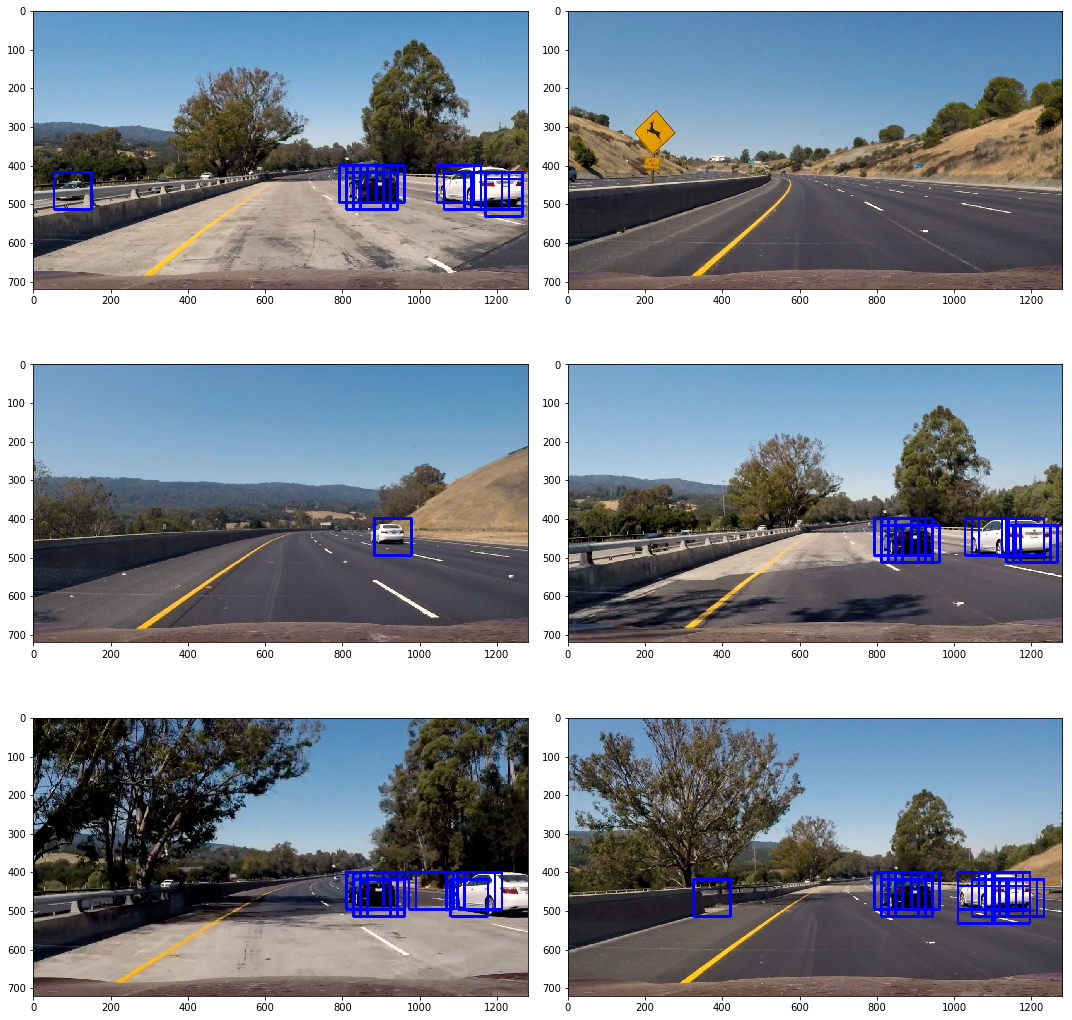

In [60]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
from classifier import get_hog_features
from utilities import bin_spatial, color_hist, convert_color


dist_pickle = pickle.load( open("svc_pickle.p", "rb" ) )
svc = dist_pickle["svc"]
X_scaler = dist_pickle["scaler"]
orient = dist_pickle["orient"]
pix_per_cell = dist_pickle["pix_per_cell"]
cell_per_block = dist_pickle["cell_per_block"]
spatial_size = dist_pickle["spatial_size"]
hist_bins = dist_pickle["hist_bins"]

bboxes = []

img = mpimg.imread('./test_images/test5.jpg')


# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img,
              ystart,
              ystop,
              scale,
              svc,
              X_scaler,
              orient,
              pix_per_cell,
              cell_per_block,
              spatial_size,
              hist_bins):

    global bboxes

    draw_img = np.copy(img)
    img = img.astype(np.float32)/255

    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell)-1
    nyblocks = (ch1.shape[0] // pix_per_cell)-1 
    nfeat_per_block = orient*cell_per_block**2
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell)-1 
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,
                              (xbox_left, ytop_draw+ystart),
                              (xbox_left+win_draw,ytop_draw+win_draw+ystart),
                              (0,0,255),6)
                bboxes.append((
                    (xbox_left, ytop_draw + ystart),
                    (xbox_left + win_draw, ytop_draw + win_draw + ystart)
                ))
                
    return draw_img
    
ystart = 400
ystop = 656
scale = 1.5

images = []

for x in range(1, 7):
    img = mpimg.imread('./test_images/test{}.jpg'.format(x))
    images.append(find_cars(img,
                            ystart,
                            ystop,
                            scale,
                            svc,
                            X_scaler,
                            orient,
                            pix_per_cell,
                            cell_per_block,
                            spatial_size,
                            hist_bins))

fig, ax = plt.subplots(3, 2, figsize=(15, 15))
ax[0, 0].imshow(images[0])
ax[0, 1].imshow(images[1])
ax[1, 0].imshow(images[2])
ax[1, 1].imshow(images[3])
ax[2, 0].imshow(images[4])
ax[2, 1].imshow(images[5])
fig.tight_layout()
